<a href="https://colab.research.google.com/github/oenereaty/ccp2/blob/main/%ED%8F%89%EA%B7%A0%EA%B0%9C%ED%99%94%EA%B5%B0%2B%EC%83%9D%EC%9E%A5%EA%B8%B8%EC%9D%B4_%EC%A0%90%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 패키지 설치
# install.packages("readxl")
install.packages("openxlsx")
# install.packages("dplyr")
# install.packages("tidyr")
# install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 평균 개화군 그래프 출력

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


ERROR: [1m[33mError[39m in `ggsave()`:[22m
[1m[22m[33m![39m Cannot find directory [34m/content/drive/MyDrive[39m.
[36mℹ[39m Please supply an existing directory or use `create.dir = TRUE`.


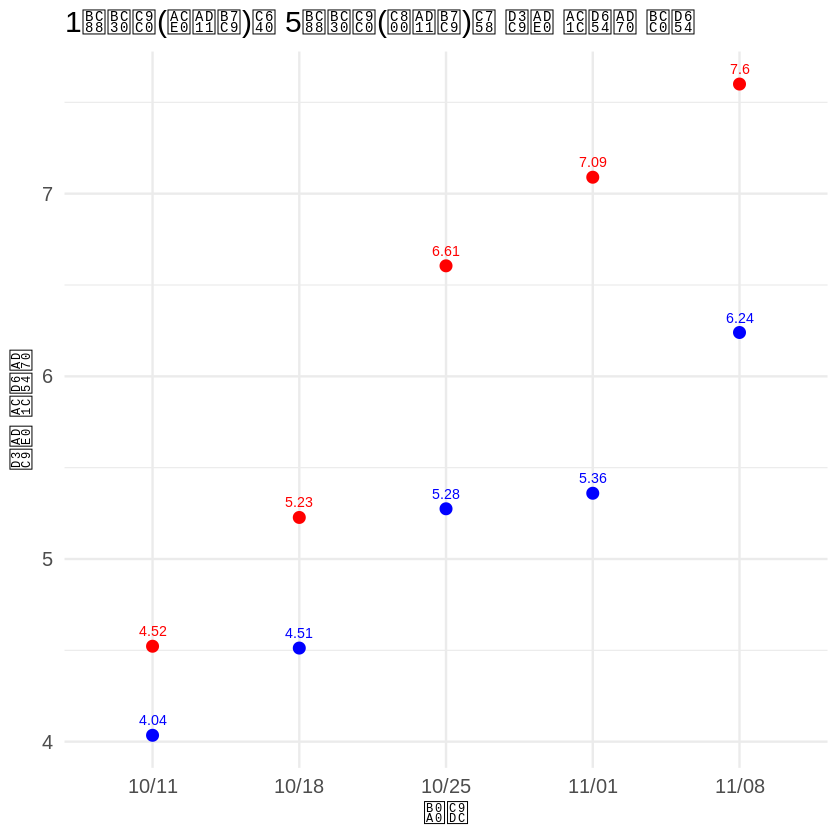

In [9]:
# 라이브러리 로드
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)

# Google Drive와 연결 (Google Drive에서 파일을 불러오려면 이 코드를 사용하세요)
# from google.colab import drive
# drive.mount('/content/drive')

# 파일 경로 (Google Drive의 경로로 수정)
file_path <- "/content/작재2 생육 데이터(개체별, R특화).xlsx"

# 시트 목록
sheets_1 <- c("1-1", "1-2", "1-4", "1-5") # 1번 개체 시트
sheets_5 <- c("5-2", "5-3", "5-4", "5-5") # 5번 개체 시트

# 데이터 로딩 함수
load_data <- function(sheet_names, group_label) {
  lapply(sheet_names, function(sheet) {
    # 시트 데이터 읽기
    sheet_data <- read_excel(file_path, sheet = sheet)

    # 열 이름 정리
    colnames(sheet_data) <- gsub(" ", "", colnames(sheet_data))
    colnames(sheet_data) <- gsub("\\(", "", colnames(sheet_data))
    colnames(sheet_data) <- gsub("\\)", "", colnames(sheet_data))
    colnames(sheet_data) <- gsub("cm", "", colnames(sheet_data))

    # '개화군'을 숫자형으로 변환
    sheet_data$개화군 <- as.numeric(sheet_data$개화군)

    # 날짜를 Date 형식으로 변환
    sheet_data$날짜 <- as.Date(sheet_data$날짜)

    # 개체별 개화군과 날짜 추가
    sheet_data <- sheet_data %>%
      select(날짜, 개화군) %>%
      mutate(group = group_label, 개체 = sheet) # 그룹 및 개체 정보 추가

    return(sheet_data)
  }) %>% bind_rows()
}

# 1번 및 5번 개체 데이터 로드
data_1 <- load_data(sheets_1, "group1")
data_5 <- load_data(sheets_5, "group5")

# 전체 데이터 결합
combined_data <- bind_rows(data_1, data_5)

# NA 값 제거
combined_data <- combined_data %>%
  filter(!is.na(개화군) & !is.na(날짜))

# 날짜 형식을 월/일 형식으로 변환
combined_data$날짜 <- format(combined_data$날짜, "%m/%d")

# 1번 개체들의 평균 개화군 구하기
weekly_avg_1 <- combined_data %>%
  filter(group == "group1") %>%
  group_by(날짜) %>%
  summarise(평균개화군 = mean(개화군, na.rm = TRUE))

# 5번 개체들의 평균 개화군 구하기
weekly_avg_5 <- combined_data %>%
  filter(group == "group5") %>%
  group_by(날짜) %>%
  summarise(평균개화군 = mean(개화군, na.rm = TRUE))

# 평균 개화군 그래프 생성
output_path <- "/content/drive/MyDrive/1번_5번_개체_평균개화군_그래프.jpeg"

# 그래프 그리기
plot <- ggplot() +
  # 1번 개체의 평균 개화군 점선
  geom_line(data = weekly_avg_1, aes(x = 날짜, y = 평균개화군), color = "red", linetype = "dashed", size = 1) +
  # 5번 개체의 평균 개화군 점선
  geom_line(data = weekly_avg_5, aes(x = 날짜, y = 평균개화군), color = "blue", linetype = "dashed", size = 1) +
  # 1번 개체 평균 개화군 점 표시
  geom_point(data = weekly_avg_1, aes(x = 날짜, y = 평균개화군), color = "red", size = 3) +
  # 5번 개체 평균 개화군 점 표시
  geom_point(data = weekly_avg_5, aes(x = 날짜, y = 평균개화군), color = "blue", size = 3) +
  # 평균 개화군 값 표시
  geom_text(data = weekly_avg_1, aes(x = 날짜, y = 평균개화군, label = round(평균개화군, 2)),
            vjust = -1, color = "red", size = 3) +
  geom_text(data = weekly_avg_5, aes(x = 날짜, y = 평균개화군, label = round(평균개화군, 2)),
            vjust = -1, color = "blue", size = 3) +
  labs(title = "1번배지(고광량)와 5번배지(저광량)의 평균 개화군 변화", x = "날짜", y = "평균 개화군") +
  theme_minimal(base_size = 15) +
  theme(legend.title = element_blank()) +
  scale_x_discrete(labels = unique(combined_data$날짜)) # 월/일 형식으로 x축 레이블 수정

# 그래프 출력
print(plot)

# 그래프 저장 (JPEG 형식)
ggsave(output_path, plot = plot, width = 10, height = 6, dpi = 300, device = "jpeg")

# 저장 경로 출력
cat("그래프가 저장되었습니다:", output_path, "\n")


# 평균 생장길이 그래프 출력

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


ERROR: [1m[33mError[39m in `ggsave()`:[22m
[1m[22m[33m![39m Cannot find directory [34m/content/drive/MyDrive[39m.
[36mℹ[39m Please supply an existing directory or use `create.dir = TRUE`.


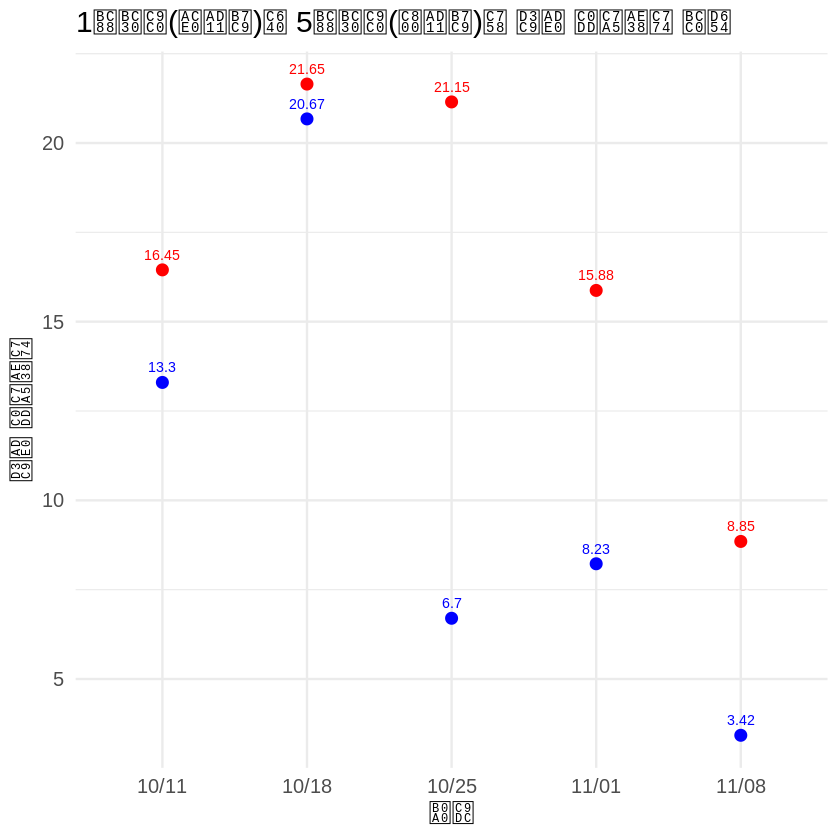

In [11]:
library(openxlsx)
library(dplyr)
library(readxl)
library(tidyr)
library(ggplot2)

# Google Drive 마운트
# library(googledrive)
# drive.mount("/content/drive")

# 파일 경로 (Google Drive 경로로 수정)
file_path <- "/content/작재2 생육 데이터(개체별, R특화).xlsx"

# 시트 목록
sheets_1 <- c("1-1", "1-2", "1-4", "1-5") # 1번 개체 시트
sheets_5 <- c("5-2", "5-3", "5-4", "5-5") # 5번 개체 시트

# 데이터 로딩 함수
load_data <- function(sheet_names, group_label) {
  lapply(sheet_names, function(sheet) {
    # 시트 데이터 읽기
    sheet_data <- read.xlsx(file_path, sheet = sheet)

    # 열 이름 정리
    colnames(sheet_data) <- gsub(" ", "", colnames(sheet_data))
    colnames(sheet_data) <- gsub("\\(", "", colnames(sheet_data))
    colnames(sheet_data) <- gsub("\\)", "", colnames(sheet_data))
    colnames(sheet_data) <- gsub("cm", "", colnames(sheet_data))

    # '생장길이'를 숫자형으로 변환
    sheet_data$생장길이 <- as.numeric(sheet_data$생장길이)

    # 날짜를 Date 형식으로 변환
    sheet_data$날짜 <- as.Date(sheet_data$날짜)

    # 개체별 생장길이와 날짜 추가
    sheet_data <- sheet_data %>%
      select(날짜, 생장길이) %>%
      mutate(group = group_label, 개체 = sheet) # 그룹 및 개체 정보 추가

    return(sheet_data)
  }) %>% bind_rows()
}

# 1번 및 5번 개체 데이터 로드
data_1 <- load_data(sheets_1, "group1")
data_5 <- load_data(sheets_5, "group5")

# 전체 데이터 결합
combined_data <- bind_rows(data_1, data_5)

# NA 값 제거
combined_data <- combined_data %>% filter(!is.na(생장길이) & !is.na(날짜))

# 날짜 형식을 월/일 형식으로 변환
combined_data$날짜 <- format(combined_data$날짜, "%m/%d")

# 1번 개체들의 평균 생장길이 구하기
weekly_avg_1 <- combined_data %>%
  filter(group == "group1") %>%
  group_by(날짜) %>%
  summarise(평균생장길이 = mean(생장길이, na.rm = TRUE))

# 5번 개체들의 평균 생장길이 구하기
weekly_avg_5 <- combined_data %>%
  filter(group == "group5") %>%
  group_by(날짜) %>%
  summarise(평균생장길이 = mean(생장길이, na.rm = TRUE))

# 그래프 생성
output_path <- "/content/drive/MyDrive/1번_5번_개체_평균생장길이_그래프.jpeg"

plot <- ggplot() +
  geom_line(data = weekly_avg_1, aes(x = 날짜, y = 평균생장길이), color = "red", linetype = "dashed", size = 1) +
  geom_line(data = weekly_avg_5, aes(x = 날짜, y = 평균생장길이), color = "blue", linetype = "dashed", size = 1) +
  geom_point(data = weekly_avg_1, aes(x = 날짜, y = 평균생장길이), color = "red", size = 3) +
  geom_point(data = weekly_avg_5, aes(x = 날짜, y = 평균생장길이), color = "blue", size = 3) +
  geom_text(data = weekly_avg_1, aes(x = 날짜, y = 평균생장길이, label = round(평균생장길이, 2)), vjust = -1, color = "red", size = 3) +
  geom_text(data = weekly_avg_5, aes(x = 날짜, y = 평균생장길이, label = round(평균생장길이, 2)), vjust = -1, color = "blue", size = 3) +
  labs(title = "1번배지(고광량)와 5번배지(저광량)의 평균 생장길이 변화", x = "날짜", y = "평균 생장길이") +
  theme_minimal(base_size = 15) +
  theme(legend.title = element_blank()) +
  scale_x_discrete(labels = unique(combined_data$날짜))

# 그래프 출력
print(plot)

# 그래프 저장 (JPEG 형식)
ggsave(output_path, plot = plot, width = 10, height = 6, dpi = 300, device = "jpeg")

# 저장 경로 출력
cat("그래프가 저장되었습니다:", output_path, "\n")
